In [1]:
import os
import torch
import numpy as np

import scanpy as sc
from anndata import AnnData
import anndata as ad

result_dir = "../edges/"
raw_type=False
use_edge=False

In [2]:
samples=['sample1_rep1', 'sample1_rep2']
sample='sample1_rep1'#samples[7]
data_dir = "../../data/BC/processed1/"
str_position_x='centerx'
str_position_y='centery'
str_cell_type='subclass'
cell_types=['B_Cells', 'CD4+_T_Cells', 'CD8+_T_Cells', 'DCIS_1', 'DCIS_2', 'Endothelial', 'IRF7+_DCs', 'Invasive_Tumor', 'LAMP3+_DCs', 'Macrophages_1', 'Macrophages_2', 'Mast_Cells', 'Myoepi_ACTA2+', 'Myoepi_KRT15+', 'Perivascular-Like', 'Prolif_Invasive_Tumor', 'Stromal', 'Stromal_&_T_Cell_Hybrid', 'T_Cell_&_Tumor_Hybrid', 'Unlabeled']
print(cell_types)

genes = torch.load("/".join(data_dir.split("/")[:-2]) + "/genes.pth")
print("GFAP" in genes,genes)
type_exp_dict=np.load(data_dir + sample + "_TypeExp.npz", allow_pickle=True)

cell_type_pair_sequence=[]
for cell_typei in cell_types:
    for cell_typej in cell_types:
        cell_type_pair_sequence.append(cell_typei+"->"+cell_typej)

feature_names=[]
for i in range(len(cell_types)):
    for j in range(len(genes)):
        feature_names.append(cell_types[i]+"--"+genes[j])

['B_Cells', 'CD4+_T_Cells', 'CD8+_T_Cells', 'DCIS_1', 'DCIS_2', 'Endothelial', 'IRF7+_DCs', 'Invasive_Tumor', 'LAMP3+_DCs', 'Macrophages_1', 'Macrophages_2', 'Mast_Cells', 'Myoepi_ACTA2+', 'Myoepi_KRT15+', 'Perivascular-Like', 'Prolif_Invasive_Tumor', 'Stromal', 'Stromal_&_T_Cell_Hybrid', 'T_Cell_&_Tumor_Hybrid', 'Unlabeled']
False ['ABCC11', 'ACTA2', 'ACTG2', 'ADAM9', 'ADGRE5', 'ADH1B', 'ADIPOQ', 'AGR3', 'AHSP', 'AIF1', 'AKR1C1', 'AKR1C3', 'ALDH1A3', 'ANGPT2', 'ANKRD28', 'ANKRD29', 'ANKRD30A', 'APOBEC3A', 'APOBEC3B', 'APOC1', 'AQP1', 'AQP3', 'AR', 'AVPR1A', 'BACE2', 'BANK1', 'BASP1', 'BTNL9', 'C15orf48', 'C1QA', 'C1QC', 'C2orf42', 'C5orf46', 'C6orf132', 'CAV1', 'CAVIN2', 'CCDC6', 'CCDC80', 'CCL20', 'CCL5', 'CCL8', 'CCND1', 'CCPG1', 'CCR7', 'CD14', 'CD163', 'CD19', 'CD1C', 'CD247', 'CD27', 'CD274', 'CD3D', 'CD3E', 'CD3G', 'CD4', 'CD68', 'CD69', 'CD79A', 'CD79B', 'CD80', 'CD83', 'CD86', 'CD8A', 'CD8B', 'CD9', 'CD93', 'CDC42EP1', 'CDH1', 'CEACAM6', 'CEACAM8', 'CENPF', 'CLCA2', 'CLDN4', '

In [3]:
import matplotlib.pyplot as plt
# Set global font sizes using rcParams
plt.rcParams.update({
    'font.size': 18,            # Global font size
    'axes.titlesize': 20,       # Font size of the axes title
    'axes.labelsize': 20,       # Font size of the x and y labels
    'xtick.labelsize': 16,      # Font size of the x-tick labels
    'ytick.labelsize': 16,      # Font size of the y-tick labels
    'legend.fontsize': 18,      # Font size of the legend
    'figure.titlesize': 24      # Font size of the figure title
})

tensor([-0.0088, -0.0058, -0.0031, -0.0013, -0.0001,  0.0005,  0.0008,  0.0009,
         0.0010,  0.0010,  0.0009,  0.0009,  0.0008,  0.0008,  0.0007,  0.0007,
         0.0006,  0.0006,  0.0006,  0.0005,  0.0005,  0.0005,  0.0004,  0.0004,
         0.0004,  0.0004,  0.0004,  0.0004,  0.0003,  0.0003,  0.0003,  0.0003,
         0.0003,  0.0003,  0.0003,  0.0003,  0.0003,  0.0003,  0.0003,  0.0003,
         0.0003,  0.0003,  0.0003,  0.0003,  0.0003,  0.0002,  0.0002,  0.0003,
         0.0002])
loss: tensor(0.1041)
random: tensor(0.1348)
first 5: tensor(0.1281)
first 10: tensor(0.1171)
first 20: tensor(0.1086)
first 30: tensor(0.1061)
first 40: tensor(0.1047)
first 50: tensor(0.1041)
torch.Size([159224, 49]) tensor([[0.0902, 0.0290, 0.0251,  ..., 0.0006, 0.0008, 0.0006],
        [0.0526, 0.0085, 0.0039,  ..., 0.0008, 0.0028, 0.0008],
        [0.0414, 0.0431, 0.0551,  ..., 0.0016, 0.0010, 0.0014],
        ...,
        [0.0251, 0.0193, 0.0062,  ..., 0.0011, 0.0011, 0.0011],
        [0.0313

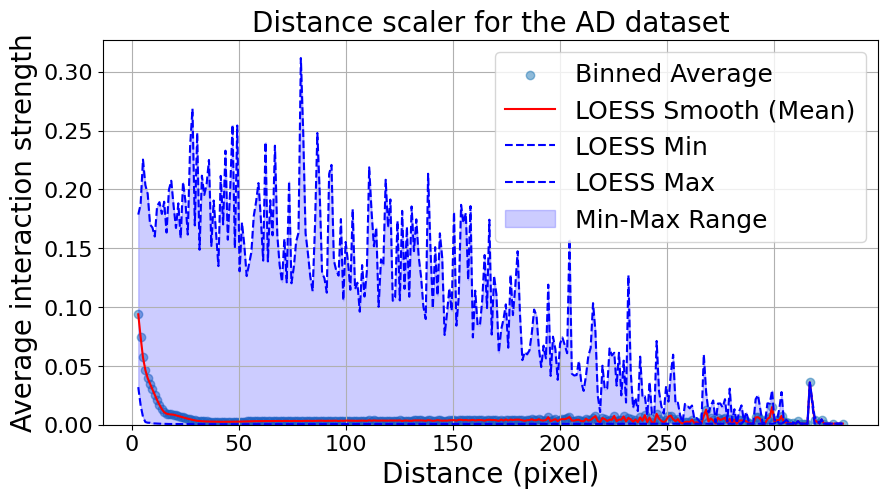

In [4]:
from scipy.stats import binned_statistic
import matplotlib.pyplot as plt
import statsmodels.api as sm

def plot_binned_average_with_loess(x, y, bins=300, frac=0.013):
    # Compute bin-wise statistics: mean, min, and max
    bin_means, bin_edges, binnumber = binned_statistic(x, y, statistic='mean', bins=bins)
    bin_mins, _, _ = binned_statistic(x, y, statistic='min', bins=bins)
    bin_maxs, _, _ = binned_statistic(x, y, statistic='max', bins=bins)

    bin_width = bin_edges[1] - bin_edges[0]
    bin_centers = bin_edges[:-1] + bin_width / 2

    # Calculate LOESS smoothing for the mean, min, and max
    lowess = sm.nonparametric.lowess
    smoothed_mean = lowess(bin_means, bin_centers, frac=frac)
    smoothed_min = lowess(bin_mins, bin_centers, frac=frac)
    smoothed_max = lowess(bin_maxs, bin_centers, frac=frac)

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.scatter(bin_centers, bin_means, alpha=0.5, label='Binned Average')
    plt.plot(smoothed_mean[:, 0], smoothed_mean[:, 1], 'r-', label='LOESS Smooth (Mean)')
    plt.plot(smoothed_min[:, 0], smoothed_min[:, 1], 'b--', label='LOESS Min')
    plt.plot(smoothed_max[:, 0], smoothed_max[:, 1], 'b--', label='LOESS Max')
    plt.fill_between(smoothed_mean[:, 0], smoothed_min[:, 1], smoothed_max[:, 1], color='b', alpha=0.2, label='Min-Max Range')

    plt.title("Distance scaler for the AD dataset")
    plt.xlabel("Distance (pixel)")
    plt.ylabel("Average interaction strength")
    if np.min(y) >= 0:
        plt.ylim(bottom=0)  # Set y-axis to start from 0
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_distance_info(sample,gene="all",use_rank=False,cumsum=False,cumsum_proportion=False,use_y_pred=False,filter_small=False):
    results=torch.load(result_dir+"edges_"+sample+".pth",map_location=torch.device('cpu'))
    attention_scores=results["attention_score"]/8
    
    print(torch.mean(attention_scores[:,:,86],dim=0))
    print("loss:",torch.mean(torch.square(results["y_pred"]-results["y"])))
    print("random:",torch.mean(torch.square(results["y"])))
    print("first 5:",torch.mean(torch.square(torch.sum(attention_scores[:,:5,:],dim=1)-results["y"])))
    print("first 10:",torch.mean(torch.square(torch.sum(attention_scores[:,:10,:],dim=1)-results["y"])))
    print("first 20:",torch.mean(torch.square(torch.sum(attention_scores[:,:20,:],dim=1)-results["y"])))
    print("first 30:",torch.mean(torch.square(torch.sum(attention_scores[:,:30,:],dim=1)-results["y"])))
    print("first 40:",torch.mean(torch.square(torch.sum(attention_scores[:,:40,:],dim=1)-results["y"])))
    print("first 50:",torch.mean(torch.square(torch.sum(attention_scores,dim=1)-results["y"])))

    proportion=torch.abs(attention_scores)
    
    if filter_small:
        tmp=proportion/torch.sum(proportion,dim=1,keepdim=True)
        proportion[tmp<0.02]=0

    #print(torch.mean(torch.abs(attention_scores)))
    #proportion=proportion/torch.sum(proportion,dim=1,keepdim=True)
    
    if gene=="all":
        proportion=torch.mean(proportion,dim=-1)
    else:
        proportion=proportion[:,:,genes.index(gene)]

    if cumsum:
        proportion=np.cumsum(proportion,axis=-1)

    if cumsum_proportion:
        cumsum_y=np.cumsum(attention_scores,axis=-2)
        if use_y_pred:
            y=results["y_pred"]
        else:
            y=results["y"]
        print(torch.mean(torch.square(results["y"]-results["y_pred"])))
        y=y.unsqueeze(dim=1)
        y=y.numpy()
        proportion=cumsum_y/y/8
        if gene=="all":
            proportion=torch.mean(proportion,dim=-1)
        else:
            proportion=proportion[:,:,genes.index(gene)]
    
    print(proportion.shape,proportion,torch.sum(proportion,dim=1))

    position_xs=results["position_x"][:,1:]
    position_ys=results["position_y"][:,1:]
    position_x0=results["position_x"][:,0:1]
    position_y0=results["position_y"][:,0:1]
    distances=torch.sqrt(torch.square(position_xs-position_x0)+torch.square(position_ys-position_y0))

    proportion=proportion.flatten().numpy()
    distance=distances.flatten().numpy()

    if use_rank:
        n=attention_scores.shape[1]
        tmp=np.arange(n)+1
        distance=np.tile(tmp, (attention_scores.shape[0], 1)).flatten()
    
    print(distance.shape,proportion.shape)
    plot_binned_average_with_loess(distance,proportion)

plot_distance_info(sample) 

tensor([-0.0088, -0.0058, -0.0031, -0.0013, -0.0001,  0.0005,  0.0008,  0.0009,
         0.0010,  0.0010,  0.0009,  0.0009,  0.0008,  0.0008,  0.0007,  0.0007,
         0.0006,  0.0006,  0.0006,  0.0005,  0.0005,  0.0005,  0.0004,  0.0004,
         0.0004,  0.0004,  0.0004,  0.0004,  0.0003,  0.0003,  0.0003,  0.0003,
         0.0003,  0.0003,  0.0003,  0.0003,  0.0003,  0.0003,  0.0003,  0.0003,
         0.0003,  0.0003,  0.0003,  0.0003,  0.0003,  0.0002,  0.0002,  0.0003,
         0.0002])
loss: tensor(0.1041)
random: tensor(0.1348)
first 5: tensor(0.1281)
first 10: tensor(0.1171)
first 20: tensor(0.1086)
first 30: tensor(0.1061)
first 40: tensor(0.1047)
first 50: tensor(0.1041)
torch.Size([159224, 49]) tensor([[0.0902, 0.0290, 0.0251,  ..., 0.0006, 0.0008, 0.0006],
        [0.0526, 0.0085, 0.0039,  ..., 0.0008, 0.0028, 0.0008],
        [0.0414, 0.0431, 0.0551,  ..., 0.0016, 0.0010, 0.0014],
        ...,
        [0.0251, 0.0193, 0.0062,  ..., 0.0011, 0.0011, 0.0011],
        [0.0313

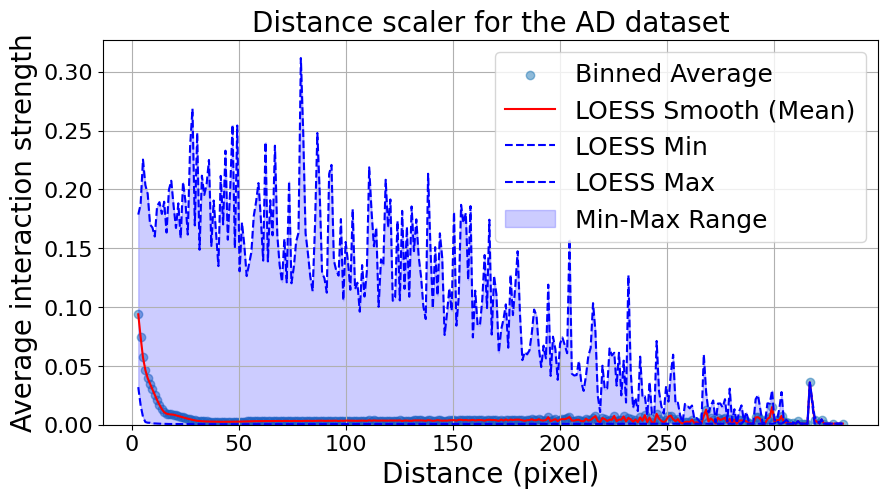

In [5]:
plot_distance_info(sample) 

tensor([-0.0088, -0.0058, -0.0031, -0.0013, -0.0001,  0.0005,  0.0008,  0.0009,
         0.0010,  0.0010,  0.0009,  0.0009,  0.0008,  0.0008,  0.0007,  0.0007,
         0.0006,  0.0006,  0.0006,  0.0005,  0.0005,  0.0005,  0.0004,  0.0004,
         0.0004,  0.0004,  0.0004,  0.0004,  0.0003,  0.0003,  0.0003,  0.0003,
         0.0003,  0.0003,  0.0003,  0.0003,  0.0003,  0.0003,  0.0003,  0.0003,
         0.0003,  0.0003,  0.0003,  0.0003,  0.0003,  0.0002,  0.0002,  0.0003,
         0.0002])
loss: tensor(0.1041)
random: tensor(0.1348)
first 5: tensor(0.1281)
first 10: tensor(0.1171)
first 20: tensor(0.1086)
first 30: tensor(0.1061)
first 40: tensor(0.1047)
first 50: tensor(0.1041)
torch.Size([159224, 49]) tensor([[1.0336e-01, 3.5028e-02, 3.6349e-02,  ..., 1.6565e-04, 2.2814e-04,
         1.4566e-04],
        [5.4590e-02, 6.8538e-03, 5.4000e-03,  ..., 1.6045e-03, 5.6979e-03,
         1.6134e-03],
        [1.0130e-01, 1.3738e-01, 1.8959e-01,  ..., 4.6691e-03, 5.9540e-03,
         4.5916

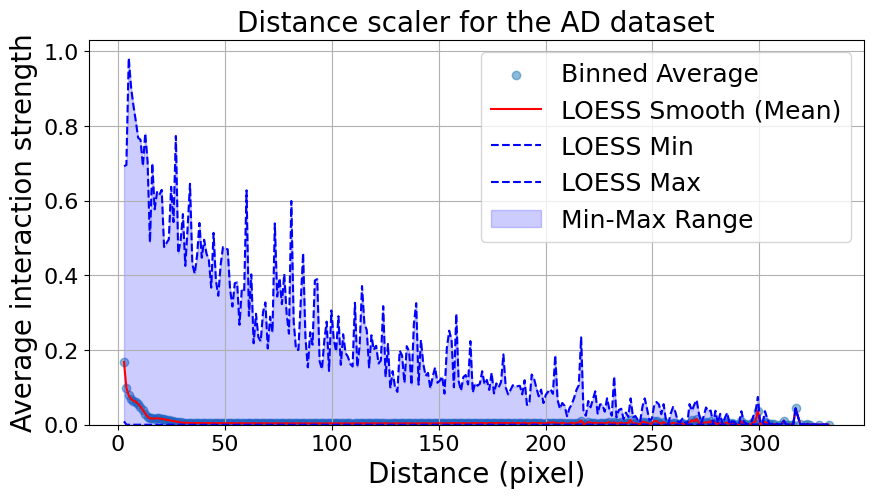

In [8]:
plot_distance_info(sample,"ABCC11") 

tensor([-0.0088, -0.0058, -0.0031, -0.0013, -0.0001,  0.0005,  0.0008,  0.0009,
         0.0010,  0.0010,  0.0009,  0.0009,  0.0008,  0.0008,  0.0007,  0.0007,
         0.0006,  0.0006,  0.0006,  0.0005,  0.0005,  0.0005,  0.0004,  0.0004,
         0.0004,  0.0004,  0.0004,  0.0004,  0.0003,  0.0003,  0.0003,  0.0003,
         0.0003,  0.0003,  0.0003,  0.0003,  0.0003,  0.0003,  0.0003,  0.0003,
         0.0003,  0.0003,  0.0003,  0.0003,  0.0003,  0.0002,  0.0002,  0.0003,
         0.0002])
loss: tensor(0.1041)
random: tensor(0.1348)
first 5: tensor(0.1281)
first 10: tensor(0.1171)
first 20: tensor(0.1086)
first 30: tensor(0.1061)
first 40: tensor(0.1047)
first 50: tensor(0.1041)
torch.Size([159224, 49]) tensor([[0.0902, 0.0290, 0.0251,  ..., 0.0006, 0.0008, 0.0006],
        [0.0526, 0.0085, 0.0039,  ..., 0.0008, 0.0028, 0.0008],
        [0.0414, 0.0431, 0.0551,  ..., 0.0016, 0.0010, 0.0014],
        ...,
        [0.0251, 0.0193, 0.0062,  ..., 0.0011, 0.0011, 0.0011],
        [0.0313

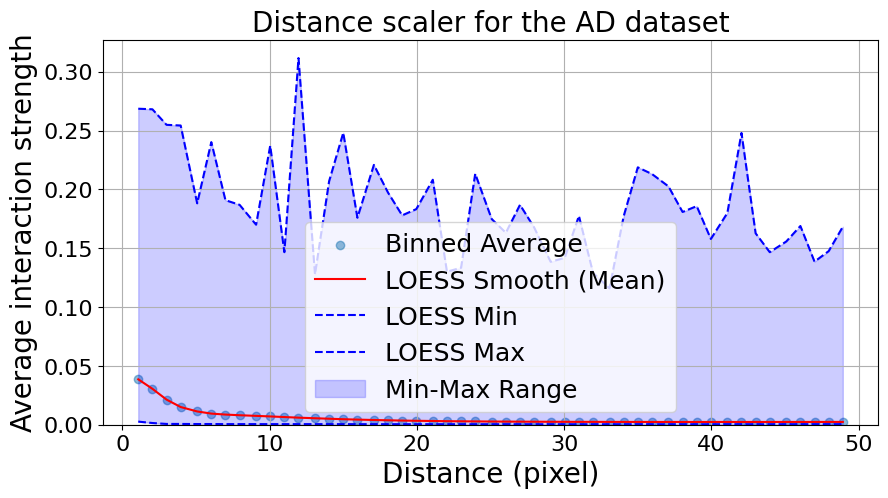

In [7]:
plot_distance_info(sample,use_rank=True) 

torch.Size([159224, 49]) tensor([[0.2037, 0.2968, 0.3653,  ..., 0.9934, 0.9974, 1.0000],
        [0.1695, 0.2031, 0.2237,  ..., 0.9875, 0.9968, 1.0000],
        [0.1220, 0.2268, 0.3562,  ..., 0.9901, 0.9939, 1.0000],
        ...,
        [0.1045, 0.2136, 0.2512,  ..., 0.9882, 0.9941, 1.0000],
        [0.1201, 0.2211, 0.2596,  ..., 0.9901, 0.9951, 1.0000],
        [0.0943, 0.1935, 0.2483,  ..., 0.9883, 0.9942, 1.0000]]) tensor([35.4397, 36.2744, 36.3125,  ..., 36.1713, 34.3004, 36.9288])
(7801976,) (7801976,)


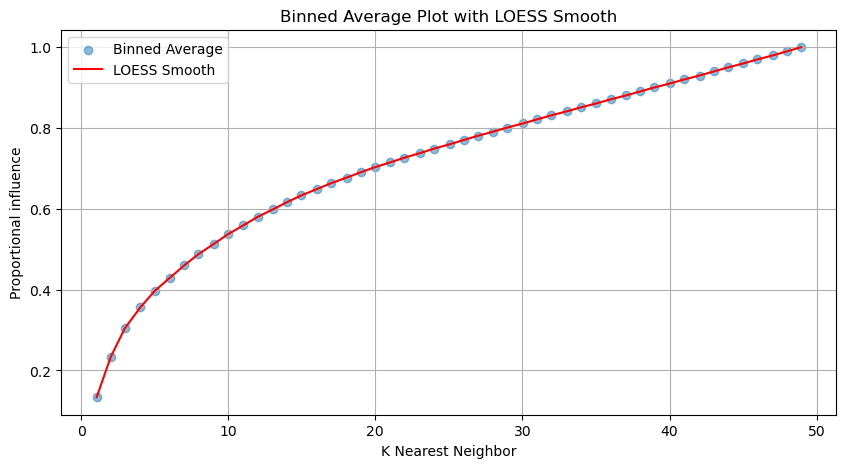

In [7]:
plot_distance_info(sample,use_rank=True,cumsum=True) 

torch.Size([159224, 49]) tensor([[0.2693, 0.3929, 0.4830,  ..., 1.0000, 1.0000, 1.0000],
        [0.2246, 0.2647, 0.2841,  ..., 0.9980, 1.0000, 1.0000],
        [0.1722, 0.3200, 0.5031,  ..., 0.9990, 0.9990, 1.0000],
        ...,
        [0.1364, 0.2855, 0.3335,  ..., 0.9997, 0.9998, 1.0000],
        [0.1605, 0.2943, 0.3422,  ..., 0.9994, 0.9996, 1.0000],
        [0.1283, 0.2563, 0.3268,  ..., 0.9997, 0.9998, 1.0000]]) tensor([38.6375, 39.5312, 41.9188,  ..., 40.5597, 37.9563, 41.6738])
(7801976,) (7801976,)


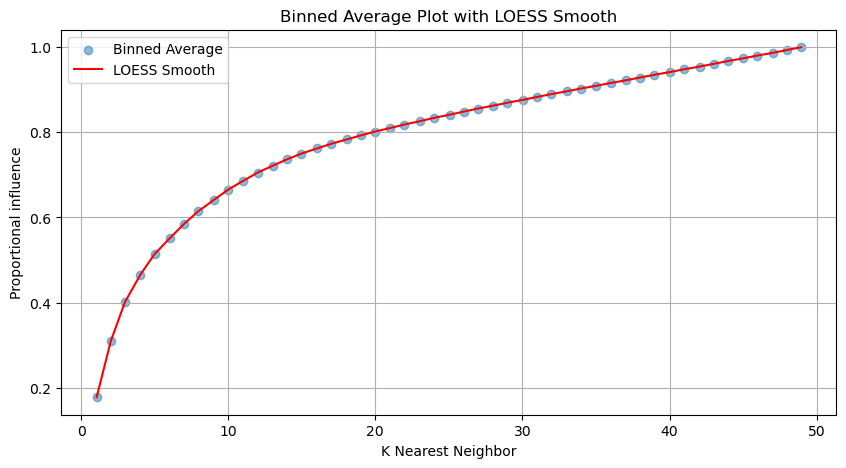

In [8]:
plot_distance_info(sample,use_rank=True,cumsum=True,filter_small=True) 

tensor(0.1041)


/tmp/ipykernel_539926/999388072.py:61: RuntimeWarning: divide by zero encountered in divide
  proportion=cumsum_y/y/8


torch.Size([159224, 49]) tensor([[ 0.3105,  0.4158,  0.5250,  ...,  0.4718,  0.4725,  0.4720],
        [ 0.1640,  0.1846,  0.1684,  ...,  0.1606,  0.1777,  0.1728],
        [ 0.0878,  0.2070,  0.3714,  ...,  0.8684,  0.8736,  0.8775],
        ...,
        [-0.1205, -0.1692, -0.1799,  ..., -0.0616, -0.0634, -0.0652],
        [ 0.3153,  0.1367,  0.1857,  ...,  1.1742,  1.1771,  1.1867],
        [-0.0439, -0.1843, -0.2398,  ..., -0.0299, -0.0310, -0.0321]]) tensor([26.6342, 13.2746, 31.3165,  ..., -3.1041, 48.1447, -1.2666])
(7801976,) (7801976,)


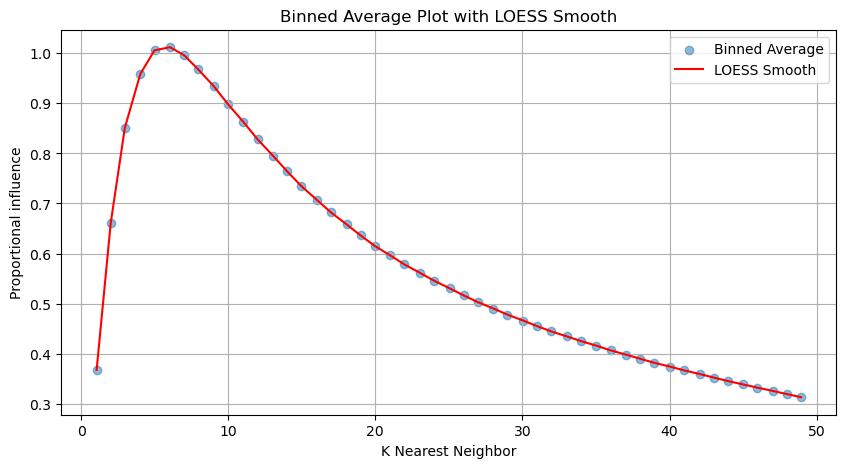

In [9]:
plot_distance_info(sample,use_rank=True,cumsum_proportion=True,gene="ABCC11")

tensor(0.1041)


/tmp/ipykernel_539926/3959185939.py:63: RuntimeWarning: divide by zero encountered in divide
  proportion=cumsum_y/y/8


torch.Size([159224, 49]) tensor([[ 0.4204,  0.7974,  1.0773,  ...,  1.0181,  0.9993,  1.0000],
        [ 1.7256,  2.0100,  2.1592,  ...,  0.9954,  1.0447,  1.0000],
        [ 0.1043,  0.0905, -0.4441,  ...,  0.8998,  0.9119,  1.0000],
        ...,
        [ 0.2705, -0.7058, -0.6563,  ...,  0.9511,  0.9756,  1.0000],
        [ 0.0923,  0.1231,  0.0888,  ...,  1.0094,  0.9943,  1.0000],
        [ 0.5423,  0.7647,  0.5963,  ...,  0.9512,  0.9756,  1.0000]]) tensor([ 48.3226, 117.6731,  16.8326,  ...,   2.2994,  54.7524,  21.3466])
(7801976,) (7801976,)


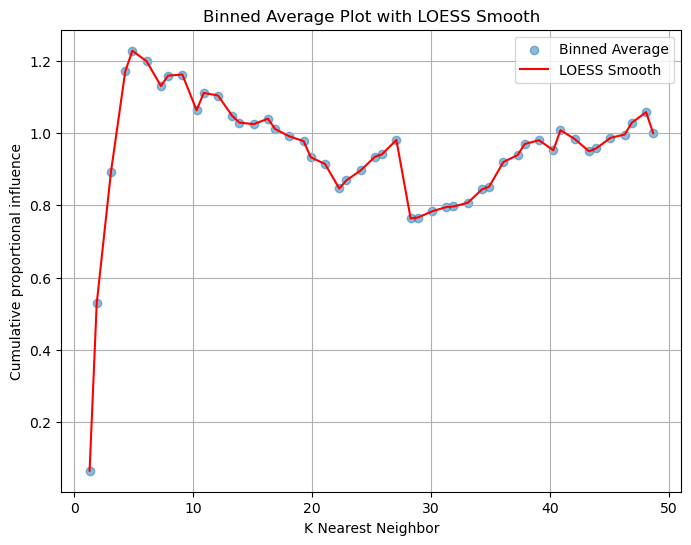

In [23]:
plot_distance_info(sample,use_rank=True,cumsum_proportion=True,use_y_pred=True)

tensor(0.1041)


/tmp/ipykernel_539926/999388072.py:61: RuntimeWarning: divide by zero encountered in divide
  proportion=cumsum_y/y/8


torch.Size([159224, 49]) tensor([[0.6579, 0.8809, 1.1122,  ..., 0.9995, 1.0009, 1.0000],
        [0.9489, 1.0680, 0.9741,  ..., 0.9290, 1.0280, 1.0000],
        [0.1001, 0.2359, 0.4232,  ..., 0.9896, 0.9955, 1.0000],
        ...,
        [1.8478, 2.5930, 2.7571,  ..., 0.9440, 0.9720, 1.0000],
        [0.2657, 0.1152, 0.1565,  ..., 0.9894, 0.9919, 1.0000],
        [1.3655, 5.7346, 7.4608,  ..., 0.9310, 0.9655, 1.0000]]) tensor([56.4263, 76.8003, 35.6865,  ..., 47.5804, 40.5708, 39.4129])
(7801976,) (7801976,)


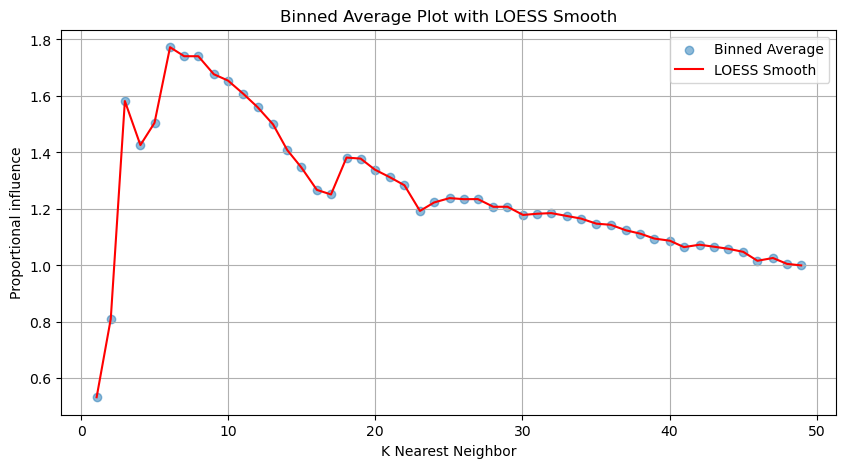

In [11]:
plot_distance_info(sample,use_rank=True,cumsum_proportion=True,use_y_pred=True,gene="ABCC11")

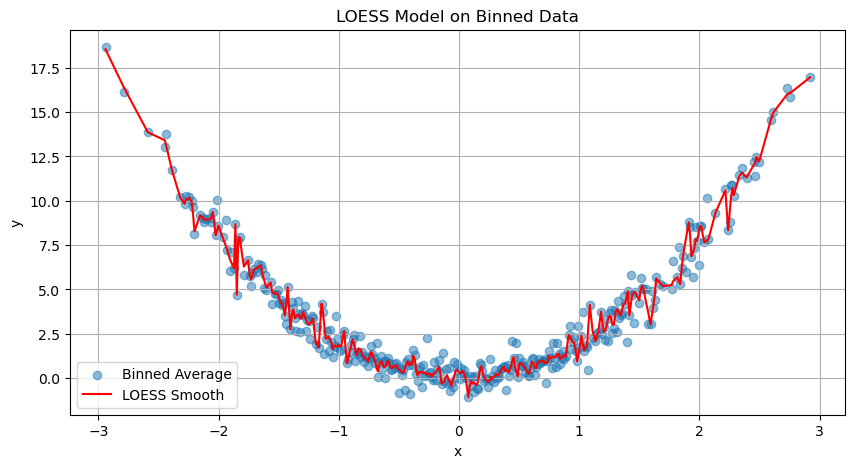

TypeError: 'function' object is not subscriptable

In [12]:
from scipy.stats import binned_statistic
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

def prepare_loess_model(x, y, bins=500, frac=0.013):
    # Bin data and compute average y for each bin
    bin_means, bin_edges, binnumber = binned_statistic(x, y, statistic='mean', bins=bins)
    bin_width = bin_edges[1] - bin_edges[0]
    bin_centers = bin_edges[:-1] + bin_width / 2

    # Calculate the smooth curve using Lowess
    lowess = sm.nonparametric.lowess
    smoothed_data = lowess(bin_means, bin_centers, frac=frac)
    
    # Plotting for visualization
    plt.figure(figsize=(10, 5))
    plt.scatter(bin_centers, bin_means, alpha=0.5, label='Binned Average')
    plt.plot(smoothed_data[:, 0], smoothed_data[:, 1], 'r-', label='LOESS Smooth')
    plt.title("LOESS Model on Binned Data")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Return the fitted LOESS model for prediction
    return lowess

def predict_with_loess_model(loess_model, new_x):
    # Predict using the fitted LOESS model
    # Find the nearest points and perform linear interpolation
    x_values = loess_model[:, 0]
    y_values = loess_model[:, 1]
    if new_x < x_values[0] or new_x > x_values[-1]:
        raise ValueError("New x value is out of the bounds of the x values in the model.")
    else:
        return np.interp(new_x, x_values, y_values)

# Example usage
x = np.random.normal(0, 1, 1000)
y = 2 * x**2 + np.random.normal(0, 1, 1000)

# Prepare the model
loess_model = prepare_loess_model(x, y)

# Predict for a new x value
new_x = 0.5
predicted_y = predict_with_loess_model(loess_model, new_x)
print(f"The predicted y value for x = {new_x} is {predicted_y}")
